
# Neural Foundations
## Activations → Loss → Gradient Descent → Sigmoid Saturation → Logistic Regression → XOR → 2-layer MLP


## 0) The neuron computation (the building block)

Every neural network is built from the same core operation.

---

### 1️⃣ Linear combination (weighted sum)

$$
z = w^T x + b
$$

- $x$ is the input feature vector  
- $w$ is the weight vector  
- $b$ is the bias  
- $z$ is the raw score (before activation)  

---

### 2️⃣ Activation / nonlinearity

$$
a = \phi(z)
$$

The activation function transforms the raw score into the neuron’s output.

---

### Why split into two parts?

- The **linear part** lets the neuron **combine features** and compute a score  
- The **activation part** lets the neuron **bend the decision boundary** and model non-linear relationships  

Without the activation step, a neural network would only be able to learn linear relationships.

---

### Terminology

In classification problems, $z$ is often called a **logit**, meaning the value before applying the sigmoid function to obtain a probability.

---

### Key takeaway

A neural network is essentially many of these simple units stacked together, each performing a linear transformation followed by a non-linear activation.



In [4]:
# Demo: compute z = w^T x + b for one example
w = np.array([2.0, -1.0])
x = np.array([3.0, 4.0])
b = 0.5

z = np.dot(w, x) + b
print("z =", z)


z = 2.5


### Practice 0 (coding)

**TODO:** Write a function `linear_forward(X, W, b)` that computes the linear transformation for a batch:

$$
Z = XW + b
$$

---

### Requirements

- `X` shape: `(N, D)` → batch of N examples with D features  
- `W` shape: `(D, K)` → weight matrix producing K outputs  
- `b` shape: `(1, K)` or `(K,)` → bias vector  
- Output `Z` shape: `(N, K)`  

---

### Goal

This function should support **batch computation**, meaning it works on multiple input examples at once using matrix multiplication.



In [5]:
# Practice 0 (coding): linear forward (TODO)
def linear_forward(X, W, b):
    # TODO: return X @ W + b
    pass

# Simple test
X_test = np.array([[1.0, 2.0],
                   [3.0, 4.0]])
W_test = np.array([[1.0, -1.0],
                   [2.0,  0.5]])
b_test = np.array([[0.1, 0.2]])

# Expected shape: (2,2)
# Uncomment after implementing:
# Z_test = linear_forward(X_test, W_test, b_test)
# print("Z_test shape:", Z_test.shape)
# print(Z_test)


## 1) Activation functions (the “decision rule”)

An activation function $\phi(\cdot)$ transforms the raw score $z$ into an output $a$.

$$
a = \phi(z)
$$

---

### Why activations matter

If you remove activations (use $\phi(z)=z$ everywhere), then stacking layers does **not** increase model power.

**Layer 1:**
$$
z_1 = XW_1 + b_1
$$

**Layer 2:**
$$
z_2 = z_1W_2 + b_2 = X(W_1W_2) + (b_1W_2 + b_2)
$$

So **multiple layers collapse into a single linear layer**.

Activations prevent this collapse by injecting **non-linearity**, allowing neural networks to learn complex patterns like curves, clusters, and hierarchical features.

---

### Activations we use

- **Step** — hard threshold; classic perceptron rule (not differentiable)  
- **Sigmoid** — smooth probability-like output in $(0,1)$  
- **tanh** — smooth, zero-centered output in $(-1,1)$  
- **ReLU** — efficient and widely used in deep learning  

---

### Key intuition

Think of activation functions as the mechanism that lets a neural network **bend decision boundaries** instead of just drawing straight lines.



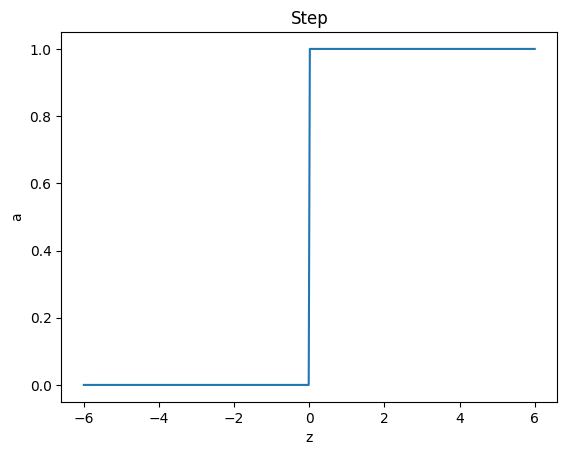

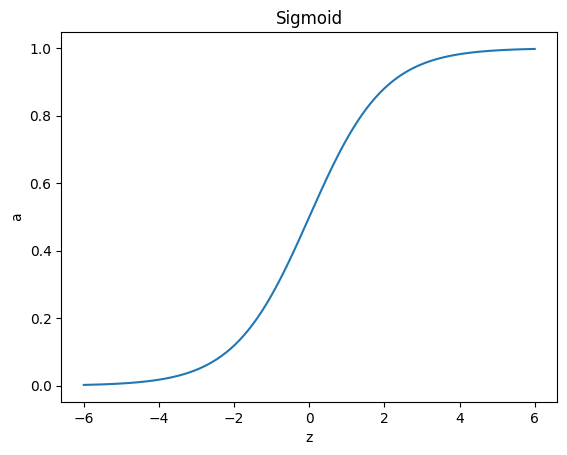

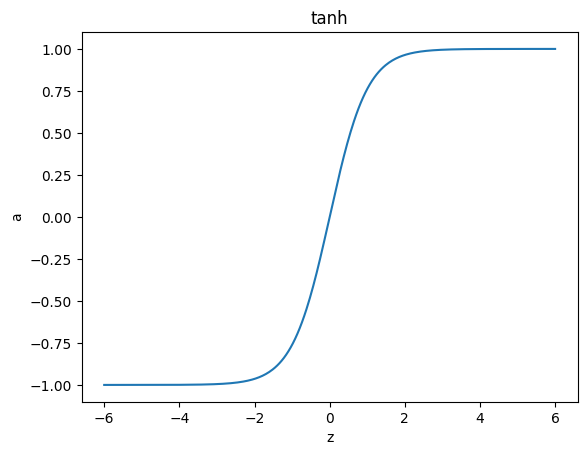

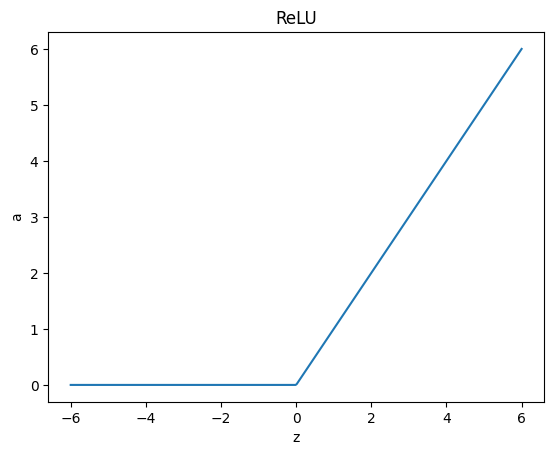

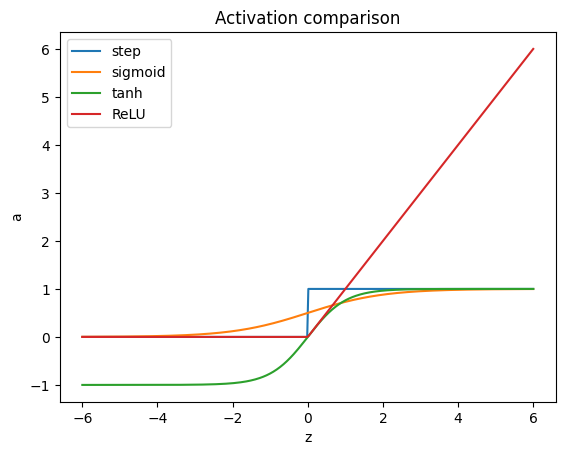

In [6]:
# Activations + plots
def step(z):
    return (z >= 0).astype(float)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0.0, z)

xs = np.linspace(-6, 6, 400)

plt.figure(); plt.plot(xs, step(xs));    plt.title("Step");    plt.xlabel("z"); plt.ylabel("a"); plt.show()
plt.figure(); plt.plot(xs, sigmoid(xs)); plt.title("Sigmoid"); plt.xlabel("z"); plt.ylabel("a"); plt.show()
plt.figure(); plt.plot(xs, tanh(xs));    plt.title("tanh");    plt.xlabel("z"); plt.ylabel("a"); plt.show()
plt.figure(); plt.plot(xs, relu(xs));    plt.title("ReLU");    plt.xlabel("z"); plt.ylabel("a"); plt.show()

plt.figure()
plt.plot(xs, step(xs), label="step")
plt.plot(xs, sigmoid(xs), label="sigmoid")
plt.plot(xs, tanh(xs), label="tanh")
plt.plot(xs, relu(xs), label="ReLU")
plt.title("Activation comparison")
plt.legend()
plt.xlabel("z"); plt.ylabel("a"); plt.show()


### Practice 1 (coding)

**TODO:** Implement **Leaky ReLU** and plot it.

Leaky ReLU is defined as:

$$
\phi(z) = \max(\alpha z, z), \quad \alpha = 0.01
$$

---

### Goal

- Write a function `leaky_relu(z, alpha=0.01)`
- The function should work elementwise for scalars, vectors, or matrices
- Then plot the function over a range of values (e.g., from -6 to 6)

---

### Why Leaky ReLU?

Leaky ReLU fixes the **“dying ReLU” problem** by allowing a small gradient when $z < 0$ instead of outputting zero.



In [7]:
# Practice 1 (coding): Leaky ReLU (TODO)
def leaky_relu(z, alpha=0.01):
    # TODO: return elementwise max(alpha*z, z)
    pass

# Plot test (uncomment after implementing)
# xs = np.linspace(-6, 6, 400)
# plt.figure()
# plt.plot(xs, leaky_relu(xs))
# plt.title("Leaky ReLU")
# plt.xlabel("z"); plt.ylabel("a")
# plt.show()


## 2) Loss functions (how we measure error)

A **loss** converts model performance into a single number that measures how wrong the predictions are.  

**Training = adjusting parameters to minimize the loss.**

---

### Regression loss: Mean Squared Error (MSE)

$$
\text{MSE} = \frac{1}{N}\sum_i(\hat{y}_i - y_i)^2
$$

**Properties**

- Works when targets are **real numbers**
- Penalizes large errors strongly because of the squared term
- Smooth and easy to optimize with gradient descent

**Typical uses:** price prediction, temperature forecasting, continuous signals

---

### Binary classification loss: Binary Cross-Entropy (BCE)

$$
\text{BCE} = -\frac{1}{N}\sum_i\left[y_i\log(\hat{p}_i) + (1-y_i)\log(1-\hat{p}_i)\right]
$$

**Properties**

- Works when targets are **0/1**
- Measures how close predicted probabilities are to true labels
- Large penalty when the model is confidently wrong

**Typical uses:** spam detection, medical diagnosis, binary classification tasks

---

### Output constraint

For BCE, predicted probabilities must satisfy:

$$
\hat{p} \in (0,1)
$$

So we typically use a **sigmoid activation** at the output layer.

---

### Practical note

In implementations, we **clip probabilities** to avoid numerical issues like:

$$
\log(0)
$$

which would otherwise cause the loss to become undefined.



In [8]:
def mse(y_hat, y):
    y_hat = np.asarray(y_hat).reshape(-1)
    y = np.asarray(y).reshape(-1)
    return np.mean((y_hat - y)**2)

def bce(p_hat, y, eps=1e-12):
    p_hat = np.clip(np.asarray(p_hat).reshape(-1), eps, 1.0-eps)
    y = np.asarray(y).reshape(-1)
    return -np.mean(y*np.log(p_hat) + (1.0-y)*np.log(1.0-p_hat))

print("MSE perfect:", mse([1,2,3.0], [1,2,3.0]))
print("MSE off:    ", mse([1,2,4.0], [1,2,3.0]))

print("BCE good:", bce([0.99, 0.01], [1,0]))
print("BCE bad: ", bce([0.01, 0.99], [1,0]))


MSE perfect: 0.0
MSE off:     0.3333333333333333
BCE good: 0.01005033585350145
BCE bad:  4.605170185988091


### Practice 2 (coding)

**TODO:** Implement a numerically stable version of Binary Cross-Entropy called `bce_stable(p_hat, y)`.

Your function should:

1. Convert inputs to NumPy arrays
2. Clip predicted probabilities to avoid numerical issues
3. Compute the BCE loss
4. Return the average loss value

---

### Mathematical definition

$$
\text{BCE} = -\frac{1}{N}\sum_i \left[ y_i \log(\hat{p}_i) + (1-y_i)\log(1-\hat{p}_i) \right]
$$

---

### Implementation requirement

Use clipping to ensure:

$$
\hat{p} \in [\epsilon, 1-\epsilon]
$$

where a typical value is:

$$
\epsilon = 10^{-12}
$$

---

### Goal

After implementing, verify your function matches the provided `bce()` function on several test cases.



In [9]:
# Practice 2 (coding): stable BCE (TODO)
def bce_stable(p_hat, y, eps=1e-12):
    # TODO:
    # 1) convert to numpy arrays
    # 2) clip p_hat to [eps, 1-eps]
    # 3) compute BCE
    pass

# Tests (uncomment after implementing)
# print("match?", abs(bce([0.2,0.8],[0,1]) - bce_stable([0.2,0.8],[0,1])) < 1e-12)
# print("match?", abs(bce([0.99,0.01],[1,0]) - bce_stable([0.99,0.01],[1,0])) < 1e-12)


## 3) Classification vs Regression (what changes in practice?)

Both tasks start from the same neuron score:

$$
z = w^T x + b
$$

What changes is the **interpretation of the output** and the **loss function** used during training.

---

### Regression

The output represents a **continuous real value**.

$$
\hat{y} = z
$$

- Often **no activation** is used at the final layer  
- The model directly predicts a number  
- Loss function: **Mean Squared Error (MSE)**  

**Typical examples:** house price prediction, temperature forecasting, stock price prediction  

---

### Binary classification

The output represents a **probability** of class 1.

$$
\hat{p} = \sigma(z)
$$

where $\sigma$ is the **sigmoid activation function**.

Prediction rule:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \hat{p} \ge 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

- Loss function: **Binary Cross-Entropy (BCE)**  

**Typical examples:** spam detection, disease prediction, pass/fail classification  

---

### Key insight

The underlying neuron computation is identical — only the **output interpretation** and **loss** change.

---

### Next step

We will generate:
- A small **regression dataset**
- A small **classification dataset**

to see these differences in practice.



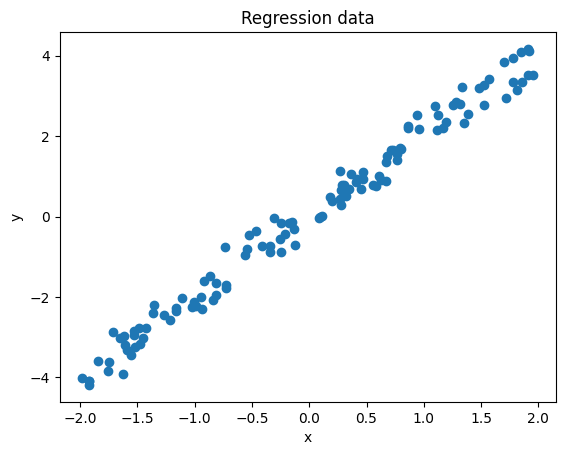

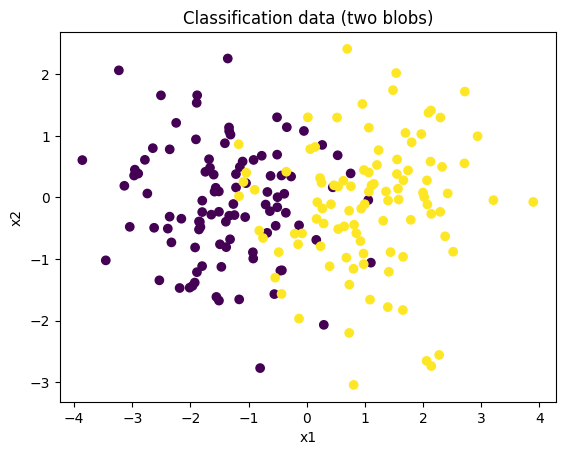

In [10]:
# Build demo datasets
np.random.seed(0)

# Regression: y = 2x + noise
N = 120
X_reg = np.random.uniform(-2, 2, size=(N,1))
y_reg = 2.0*X_reg[:,0] + 0.3*np.random.randn(N)

# Classification: two blobs
N2 = 200
X0 = np.random.randn(N2//2, 2) + np.array([-1.2, 0.0])
X1 = np.random.randn(N2//2, 2) + np.array([ 1.2, 0.0])
X_clf = np.vstack([X0, X1])
y_clf = np.array([0]*(N2//2) + [1]*(N2//2))

plt.figure()
plt.scatter(X_reg[:,0], y_reg)
plt.title("Regression data")
plt.xlabel("x"); plt.ylabel("y"); plt.show()

scatter2d(X_clf, y_clf, title="Classification data (two blobs)")


### Practice 3 (coding)

**TODO:** Implement a function `predict_binary(p_hat, threshold)` that converts predicted probabilities into binary class labels.

---

### Task 1 — Prediction function

Your function should:

- Take a vector of probabilities `p_hat`
- Apply a threshold
- Return a vector of 0/1 predictions

Rule:

$$
\hat{y} =
\begin{cases}
1 & \text{if } p \ge \text{threshold} \\
0 & \text{otherwise}
\end{cases}
$$

---

### Task 2 — Accuracy comparison

1. Generate a random probability vector
2. Compute predictions using thresholds:
   - 0.3
   - 0.5
   - 0.7
3. Compute accuracy for each threshold

---

### Goal

Understand how the choice of threshold affects classification decisions and model accuracy.



In [11]:
# Practice 3 (coding): thresholding + accuracy (TODO)
def predict_binary(p_hat, threshold=0.5):
    # TODO: return 0/1 predictions using threshold
    pass

def accuracy(y_pred, y_true):
    y_pred = np.asarray(y_pred).reshape(-1)
    y_true = np.asarray(y_true).reshape(-1)
    return np.mean(y_pred == y_true)

# Test on fake probabilities
p = np.array([0.1, 0.4, 0.6, 0.9])
y_true = np.array([0, 0, 1, 1])

# Uncomment after implementing:
# for t in [0.3, 0.5, 0.7]:
#     y_pred = predict_binary(p, threshold=t)
#     print("threshold", t, "pred", y_pred, "acc", accuracy(y_pred, y_true))


## 4) Gradient descent training (single neuron)

Gradient descent is an optimization algorithm used to update model parameters in order to **reduce the loss**.

The update rule is:

$$
\theta \leftarrow \theta - \eta \nabla L(\theta)
$$

where:

- $\theta$ represents the parameters (weights and bias)
- $\eta$ is the **learning rate** (step size)
- $\nabla L(\theta)$ is the **gradient** (direction of steepest increase of the loss)

By subtracting the gradient, we move in the direction that **reduces the loss**.

---

### Gradients for a single neuron

For a single neuron, we can compute gradients analytically.

#### Regression with MSE

When using Mean Squared Error:

$$
\text{MSE} = \frac{1}{N}\sum (\hat{y} - y)^2
$$

The gradient is proportional to:

$$
(\hat{y} - y)
$$

which represents the prediction error.

---

#### Classification with sigmoid + BCE

When using sigmoid output and Binary Cross-Entropy loss, the gradient simplifies nicely to:

$$
(\hat{p} - y)
$$

This simplification is one reason why sigmoid + BCE is commonly used.

---

### What we will train

We will train two models:

1. **A linear neuron** for regression using MSE  
2. **A sigmoid neuron** for classification using BCE  

This will illustrate how gradient descent works in both settings.



In [12]:
class SingleNeuron(object):
    def __init__(self, input_dim):
        self.W = 0.1*np.random.randn(input_dim, 1)
        self.b = 0.0

    def linear(self, X):
        return X.dot(self.W) + self.b

    def predict_regression(self, X):
        return self.linear(X).reshape(-1)

    def predict_proba(self, X):
        return sigmoid(self.linear(X)).reshape(-1)

    def predict_class(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

def train_regression(neuron, X, y, lr=0.2, epochs=300):
    y = y.reshape(-1,1)
    hist = []
    for e in range(epochs):
        z = neuron.linear(X)
        y_hat = z
        N = X.shape[0]
        dy = (2.0*(y_hat - y))/N

        dW = X.T.dot(dy)
        db = np.sum(dy)

        neuron.W -= lr*dW
        neuron.b -= lr*db

        if (e % 50 == 0) or (e == epochs-1):
            hist.append(mse(y_hat.reshape(-1), y.reshape(-1)))
    return hist

def train_classification(neuron, X, y, lr=0.7, epochs=400):
    y = y.reshape(-1,1)
    hist = []
    for e in range(epochs):
        z = neuron.linear(X)
        p = sigmoid(z)
        N = X.shape[0]
        dz = (p - y)/N

        dW = X.T.dot(dz)
        db = np.sum(dz)

        neuron.W -= lr*dW
        neuron.b -= lr*db

        if (e % 80 == 0) or (e == epochs-1):
            hist.append(bce(p.reshape(-1), y.reshape(-1)))
    return hist


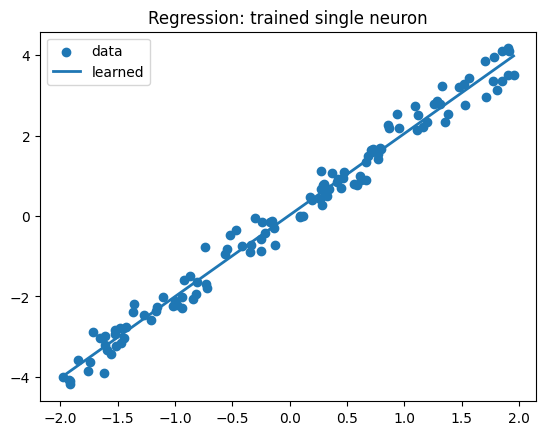

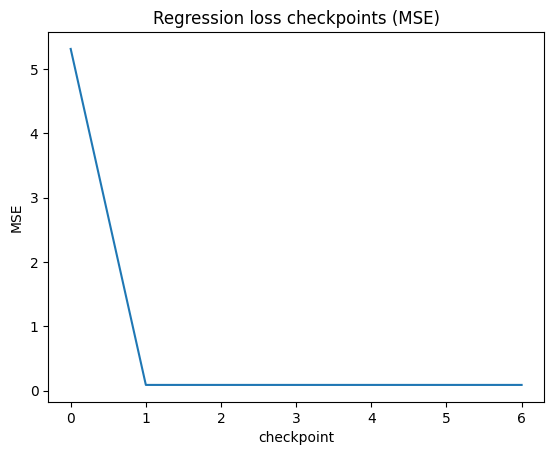

In [13]:
# Train regression neuron
reg_neuron = SingleNeuron(input_dim=1)
mse_hist = train_regression(reg_neuron, X_reg, y_reg, lr=0.2, epochs=300)

xs = np.linspace(X_reg.min(), X_reg.max(), 100).reshape(-1,1)
ys = reg_neuron.predict_regression(xs)

plt.figure()
plt.scatter(X_reg[:,0], y_reg, label="data")
plt.plot(xs[:,0], ys, label="learned", linewidth=2)
plt.title("Regression: trained single neuron")
plt.legend()
plt.show()

plt.figure()
plt.plot(mse_hist)
plt.title("Regression loss checkpoints (MSE)")
plt.xlabel("checkpoint"); plt.ylabel("MSE")
plt.show()


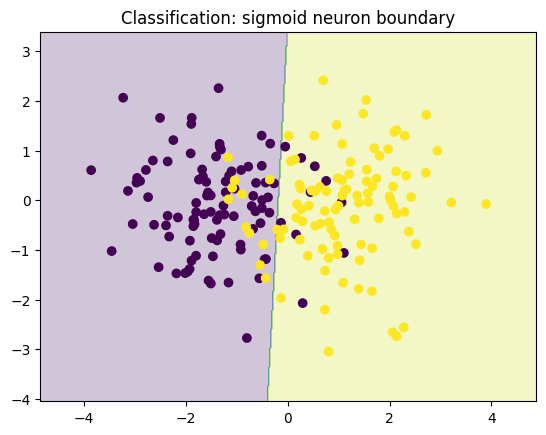

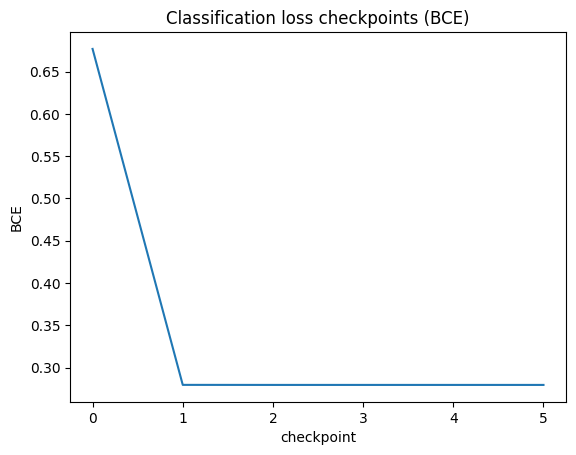

In [14]:
# Train classification neuron
clf_neuron = SingleNeuron(input_dim=2)
bce_hist = train_classification(clf_neuron, X_clf, y_clf, lr=0.7, epochs=400)

def plot_linear_boundary_2d(X, y, neuron, title=""):
    x_min, x_max = X[:,0].min()-1.0, X[:,0].max()+1.0
    y_min, y_max = X[:,1].min()-1.0, X[:,1].max()+1.0
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred = neuron.predict_class(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, pred, alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.show()

plot_linear_boundary_2d(X_clf, y_clf, clf_neuron, title="Classification: sigmoid neuron boundary")

plt.figure()
plt.plot(bce_hist)
plt.title("Classification loss checkpoints (BCE)")
plt.xlabel("checkpoint"); plt.ylabel("BCE")
plt.show()



### Practice 4 (coding)
**TODO:** Implement mini-batch training for the classification neuron (batch size 32).
Then compare the loss curve with full-batch training.


In [15]:
# Practice 4 (coding): Mini-batch training (TODO)
def train_classification_minibatch(neuron, X, y, lr=0.7, epochs=300, batch_size=32):
    # TODO:
    # for each epoch:
    # 1) shuffle indices
    # 2) loop over mini-batches
    # 3) compute p = sigmoid(XbW + b)
    # 4) dz = (p - yb)/batch_size
    # 5) update W and b
    pass

# Uncomment to try:
# clf_mb = SingleNeuron(input_dim=2)
# hist_mb = train_classification_minibatch(clf_mb, X_clf, y_clf, lr=0.7, epochs=300, batch_size=32)
# plot_linear_boundary_2d(X_clf, y_clf, clf_mb, title="Mini-batch trained boundary")
# plt.figure(); plt.plot(hist_mb); plt.title("Mini-batch BCE checkpoints"); plt.show()


## 5) Sigmoid: derivative and saturation

The sigmoid function is a smooth activation that maps logits to probabilities:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

It is commonly used in binary classification because its output lies in the interval:

$$
(0, 1)
$$

---

### Derivative of sigmoid

The derivative has a convenient closed form:

$$
\sigma'(z) = \sigma(z)\big(1 - \sigma(z)\big)
$$

This expression is efficient to compute because it can reuse the sigmoid output.

---

### Saturation

When the magnitude of $z$ is large, sigmoid becomes almost flat.

- For very negative $z$:  
  $$
  \sigma(z) \approx 0
  $$

- For very positive $z$:  
  $$
  \sigma(z) \approx 1
  $$

In both cases:

$$
\sigma'(z) \approx 0
$$

---

### Why saturation matters

If gradients are close to zero, parameter updates become extremely small.  
This can cause learning to slow down significantly — a phenomenon known as **vanishing gradients**, especially in deep networks.

---

### Key takeaway

Sigmoid is useful for probabilistic outputs, but its saturation behavior can make training deep networks difficult.



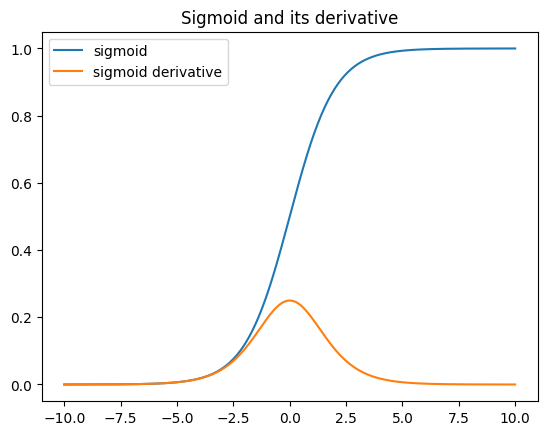

z=-20 | sigmoid=0.000000 | sigmoid'= 0.000000
z=-10 | sigmoid=0.000045 | sigmoid'= 0.000045
z= -5 | sigmoid=0.006693 | sigmoid'= 0.006648
z=  0 | sigmoid=0.500000 | sigmoid'= 0.250000
z=  5 | sigmoid=0.993307 | sigmoid'= 0.006648
z= 10 | sigmoid=0.999955 | sigmoid'= 0.000045
z= 20 | sigmoid=1.000000 | sigmoid'= 0.000000


In [16]:
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s*(1.0-s)

zs = np.linspace(-10, 10, 400)
plt.figure()
plt.plot(zs, sigmoid(zs), label="sigmoid")
plt.plot(zs, sigmoid_derivative(zs), label="sigmoid derivative")
plt.title("Sigmoid and its derivative")
plt.legend()
plt.show()

for z in [-20, -10, -5, 0, 5, 10, 20]:
    print("z=%3d | sigmoid=%.6f | sigmoid'=% .6f" % (z, sigmoid(z), sigmoid_derivative(z)))


### Practice 5 (coding)

**TODO:** Implement the derivative of the hyperbolic tangent function and visualize it.

---

### Mathematical definition

The tanh function is:

$$
\tanh(z)
$$

Its derivative is:

$$
\frac{d}{dz}\tanh(z) = 1 - \tanh^2(z)
$$

---

### Task

1. Write a function `tanh_derivative(z)` that computes:

$$
1 - \tanh^2(z)
$$

2. Generate a range of values (for example, from -6 to 6)
3. Plot **tanh(z)** and **tanh_derivative(z)** on the same figure
4. Add labels and a legend

---

### Goal

Understand how the tanh derivative behaves and compare it to sigmoid saturation behavior.




In [17]:
# Practice 5 (coding): tanh derivative (TODO)
def tanh_derivative(z):
    # TODO: derivative of tanh(z) is 1 - tanh(z)^2
    pass

# Plot test (uncomment after implementing)
# zs = np.linspace(-6, 6, 400)
# plt.figure()
# plt.plot(zs, tanh(zs), label="tanh")
# plt.plot(zs, tanh_derivative(zs), label="tanh derivative")
# plt.legend()
# plt.title("tanh and its derivative")
# plt.show()


## 6) One sigmoid neuron = logistic regression

A single sigmoid neuron is mathematically equivalent to **logistic regression**.

The model computes a linear score:

$$
z = w^T x + b
$$

Then converts it into a probability using the sigmoid function:

$$
\hat{p} = \sigma(z)
$$

Training is done by minimizing **Binary Cross-Entropy (BCE)** using gradient descent.

---

### Interpretation

- $z$ is the **logit** (raw score before probability)
- $\hat{p}$ is the predicted probability of class 1
- The model learns parameters $w$ and $b$ that best separate the classes

---

### Decision boundary

The decision boundary is defined by:

$$
z = 0
$$

which is a **linear function of the inputs**.

Therefore:

- In **2D**, the boundary is a **line**
- In **3D**, the boundary is a **plane**
- In higher dimensions, it is a **hyperplane**

---

### Key insight

Even though the sigmoid function is non-linear, the boundary in input space remains linear because it depends on a linear combination of features.



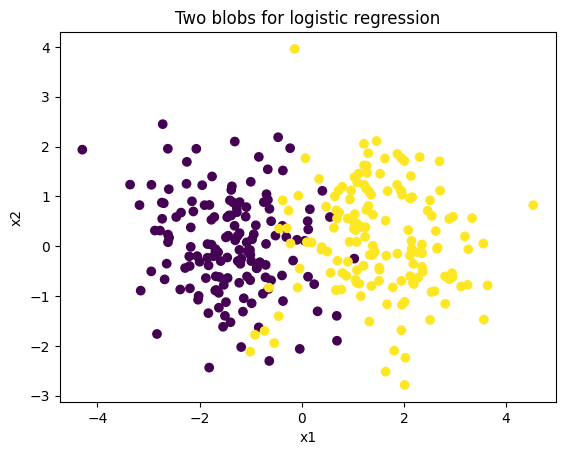

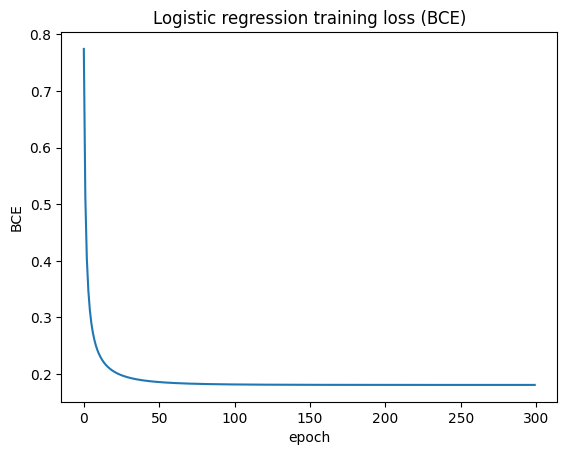

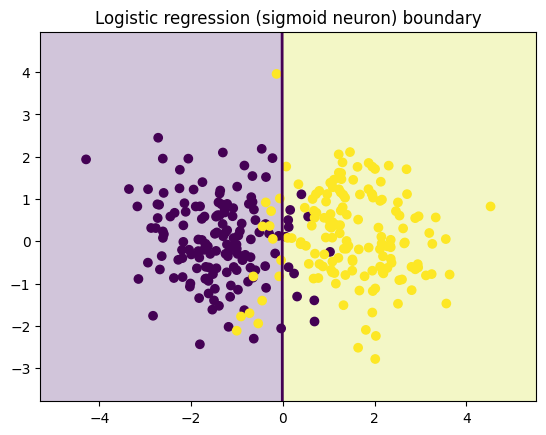

In [18]:
# Train logistic regression on two blobs and visualize boundary
np.random.seed(1)
N = 300
X0 = np.random.randn(N//2, 2) + np.array([-1.5, 0.0])
X1 = np.random.randn(N//2, 2) + np.array([ 1.5, 0.0])
X = np.vstack([X0, X1])
y = np.array([0]*(N//2) + [1]*(N//2))

scatter2d(X, y, title="Two blobs for logistic regression")

def train_sigmoid_classifier(X, y, lr=0.5, epochs=300):
    W = 0.1*np.random.randn(X.shape[1])
    b = 0.0
    losses = []
    for e in range(epochs):
        z = X.dot(W) + b
        p = sigmoid(z)
        losses.append(bce(p, y))

        dz = (p - y) / X.shape[0]
        dW = X.T.dot(dz)
        db = np.sum(dz)
        W -= lr*dW
        b -= lr*db
    return W, b, losses

W_lr, b_lr, losses_lr = train_sigmoid_classifier(X, y, lr=0.5, epochs=300)

plt.figure()
plt.plot(losses_lr)
plt.title("Logistic regression training loss (BCE)")
plt.xlabel("epoch"); plt.ylabel("BCE")
plt.show()

def plot_decision_boundary_sigmoid(X, y, W, b, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-1.0, X[:,0].max()+1.0
    y_min, y_max = X[:,1].min()-1.0, X[:,1].max()+1.0
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    p = sigmoid(grid.dot(W) + b).reshape(xx.shape)
    pred = (p >= 0.5).astype(int)

    plt.figure()
    plt.contourf(xx, yy, pred, alpha=0.25)
    plt.contour(xx, yy, p, levels=[0.5], linewidths=2)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.show()

plot_decision_boundary_sigmoid(X, y, W_lr, b_lr, title="Logistic regression (sigmoid neuron) boundary")


### Practice 6 (coding)

**TODO:** Implement a function `accuracy_with_threshold(X, y, W, b, threshold)` to evaluate classification performance at different probability thresholds.

---

### Task

1. Compute predicted probabilities:

$$
\hat{p} = \sigma(XW + b)
$$

2. Convert probabilities into class predictions using a threshold:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \hat{p} \ge \text{threshold} \\
0 & \text{otherwise}
\end{cases}
$$

3. Compute accuracy:

$$
\text{accuracy} = \frac{\text{number of correct predictions}}{\text{total samples}}
$$

---

### Experiment

Compare accuracy for thresholds:

- 0.3  
- 0.5  
- 0.7  

---

### Goal

Understand how changing the classification threshold affects model performance and decision boundaries.



In [19]:
# Practice 6 (coding): threshold effect (TODO)
def accuracy_with_threshold(X, y, W, b, threshold=0.5):
    # TODO:
    # 1) compute p = sigmoid(XW + b)
    # 2) threshold to predictions
    # 3) return accuracy
    pass

# Uncomment after implementing:
# for t in [0.3, 0.5, 0.7]:
#     print("threshold", t, "acc", accuracy_with_threshold(X, y, W_lr, b_lr, t))



## 7) XOR: why one neuron fails

XOR points cannot be separated by a single straight line in 2D.  
Since logistic regression / one neuron has a linear boundary, it cannot solve XOR perfectly.

We’ll show it by training a sigmoid neuron on XOR and visualizing the boundary.


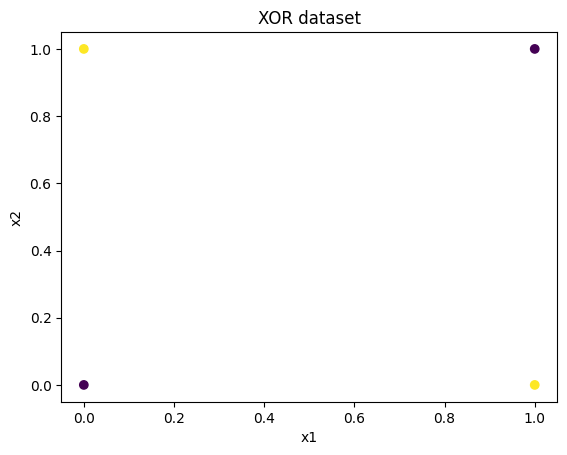

In [20]:
# XOR dataset
X_xor = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype=float)
y_xor = np.array([0,1,1,0], dtype=int)

scatter2d(X_xor, y_xor, title="XOR dataset")


Final loss: 0.6931471805599453
Accuracy: 0.5


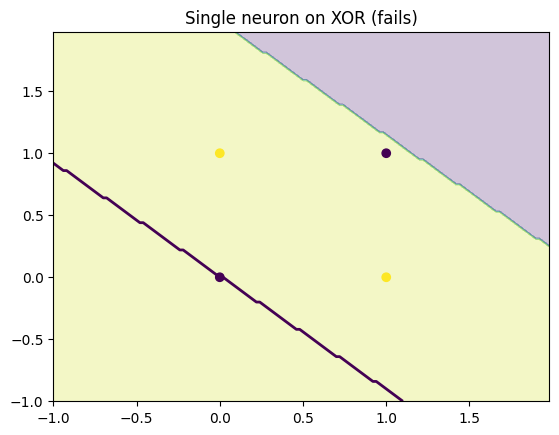

In [21]:
# Train one sigmoid neuron on XOR (won't reach perfect accuracy)
W_x, b_x, losses_x = train_sigmoid_classifier(X_xor, y_xor, lr=1.0, epochs=2000)

p = sigmoid(X_xor.dot(W_x) + b_x)
pred = (p >= 0.5).astype(int)
print("Final loss:", losses_x[-1])
print("Accuracy:", np.mean(pred == y_xor))

plot_decision_boundary_sigmoid(X_xor, y_xor, W_x, b_x, title="Single neuron on XOR (fails)")



### Practice 7 (coding)
**TODO:** Try different learning rates `[0.1, 0.5, 1.0, 3.0]` and record the final XOR accuracy.  
Which learning rate gives the best result (even if not perfect)?


In [22]:
# Practice 7 (coding): learning rate sweep (TODO)
lrs = [0.1, 0.5, 1.0, 3.0]

# TODO:
# for lr in lrs:
#   train_sigmoid_classifier on XOR
#   compute final accuracy
#   print(lr, accuracy)



## 8) A 2-layer network solves XOR

A hidden layer lets the model build **intermediate features**.  
For XOR, the hidden layer can learn two different linear cuts, and the output layer can combine them.

Architecture:
- Input (2) → Hidden (H) → Output (1)
- Hidden activation: sigmoid (for simplicity)
- Output activation: sigmoid
- Loss: BCE


epoch     0 | loss 0.7023 | acc 0.500
epoch  2000 | loss 0.3475 | acc 0.500
epoch  4000 | loss 0.3470 | acc 0.500
epoch  6000 | loss 0.3469 | acc 0.500
epoch  8000 | loss 0.3468 | acc 0.500
epoch 10000 | loss 0.3467 | acc 0.500
epoch 11999 | loss 0.3467 | acc 0.500


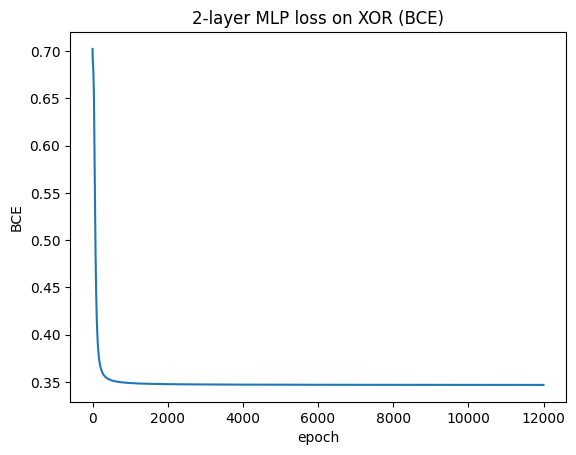

In [23]:
# Train a tiny 2-layer MLP on XOR (from scratch)
def train_xor_mlp(X, y, hidden=2, lr=3.0, epochs=12000):
    np.random.seed(0)
    N, D = X.shape
    y = y.reshape(-1,1)

    W1 = 0.5*np.random.randn(D, hidden)
    b1 = np.zeros((1, hidden))
    W2 = 0.5*np.random.randn(hidden, 1)
    b2 = np.zeros((1, 1))

    losses = []
    for e in range(epochs):
        # forward
        Z1 = X.dot(W1) + b1
        A1 = sigmoid(Z1)
        Z2 = A1.dot(W2) + b2
        P  = sigmoid(Z2)

        # loss
        losses.append(bce(P.reshape(-1), y.reshape(-1)))

        # backward
        dZ2 = (P - y) / N
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = dZ2.dot(W2.T)
        dZ1 = dA1 * (A1*(1.0-A1))
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # update
        W1 -= lr*dW1; b1 -= lr*db1
        W2 -= lr*dW2; b2 -= lr*db2

        if e % 2000 == 0 or e == epochs-1:
            pred = (P.reshape(-1) >= 0.5).astype(int)
            acc = np.mean(pred == y.reshape(-1))
            print("epoch %5d | loss %.4f | acc %.3f" % (e, losses[-1], acc))

    return (W1,b1,W2,b2), losses

params_xor, losses_mlp = train_xor_mlp(X_xor, y_xor, hidden=2, lr=3.0, epochs=12000)

plt.figure()
plt.plot(losses_mlp)
plt.title("2-layer MLP loss on XOR (BCE)")
plt.xlabel("epoch"); plt.ylabel("BCE")
plt.show()


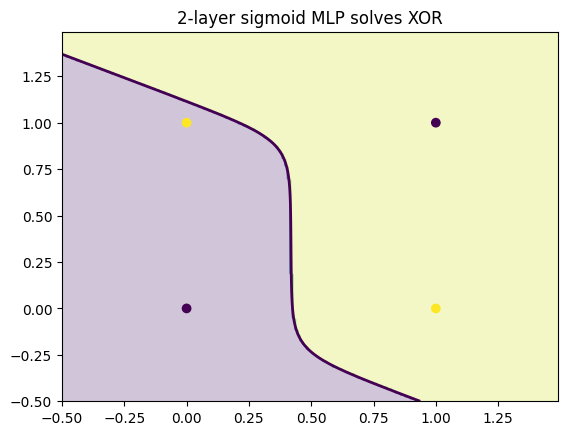

In [24]:
# Visualize nonlinear decision boundary for XOR MLP
W1,b1,W2,b2 = params_xor

def mlp_predict_proba(grid):
    Z1 = grid.dot(W1) + b1
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2) + b2
    return sigmoid(Z2).reshape(-1)

def plot_mlp_boundary(X, y, title="MLP boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    p = mlp_predict_proba(grid).reshape(xx.shape)
    pred = (p >= 0.5).astype(int)

    plt.figure()
    plt.contourf(xx, yy, pred, alpha=0.25)
    plt.contour(xx, yy, p, levels=[0.5], linewidths=2)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.show()

plot_mlp_boundary(X_xor, y_xor, title="2-layer sigmoid MLP solves XOR")



### Practice 8 (coding)
**TODO:** Modify the XOR MLP to use **tanh** in the hidden layer.

Hints:
- Forward: `A1 = tanh(Z1)`
- Derivative: `dZ1 = dA1 * (1 - A1**2)`


In [25]:
# Practice 8 (coding): tanh hidden layer (TODO)
# TODO:
# 1) Implement train_xor_mlp_tanh_hidden(...)
# 2) Train on XOR
# 3) Plot loss and decision boundary

# You can copy train_xor_mlp and only change:
#   A1 = tanh(Z1)
#   dZ1 = dA1 * (1 - A1**2)



---

# Wrap-up

You now have a complete teaching progression:
- neuron math → activations → losses → gradient descent → sigmoid saturation  
→ logistic regression → XOR failure → XOR solved with a 2-layer MLP

If you want a **student handout version**, I can produce a copy with all demo outputs removed and only the TODO practice cells.
